In [1]:
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.metrics import accuracy_score
from scipy.stats import entropy



In [2]:
# read dataframe
Rawdata = pd.read_csv('./sizes3.csv', header = 0)
Rawdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1000 non-null   float64
 1   y       1000 non-null   float64
 2   class   1000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 23.6 KB


偏度(Skewness): -0.97, 峰度(Kurtosis): -0.07


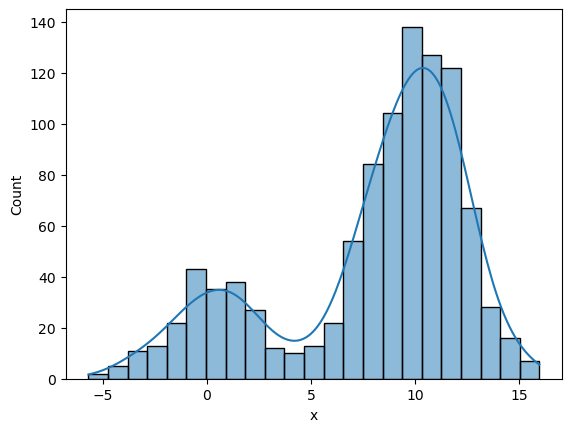

In [3]:
# skewness 與 kurtosis
import seaborn as sns
df = Rawdata
skewness = round(df['x'].skew(), 2)
kurtosis = round(df['x'].kurt(), 2)
print(f"偏度(Skewness): {skewness}, 峰度(Kurtosis): {kurtosis}")

# 繪製分布圖
sns.histplot(df['x'], kde=True)
plt.show()

Shape Of The Before Ouliers:  (1000, 3)
Shape Of The After Ouliers:  (939, 3)


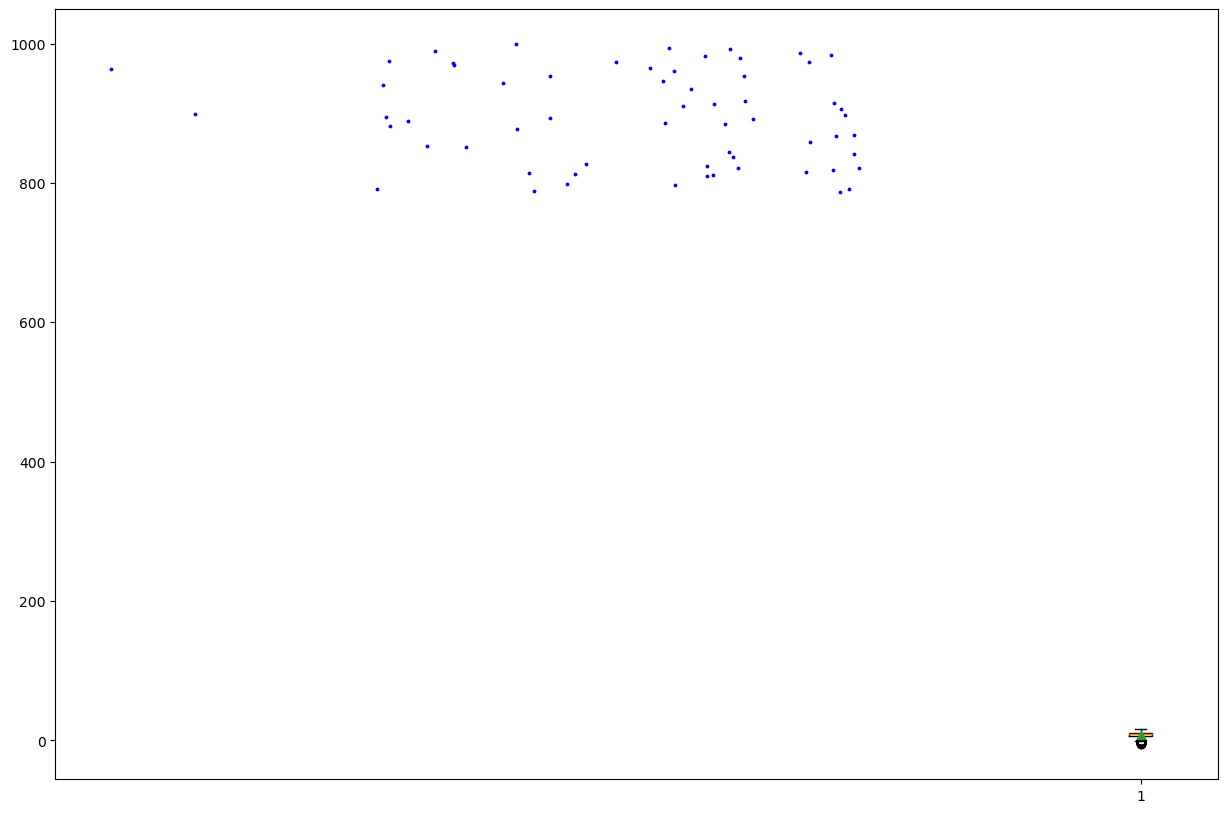

In [4]:
print ("Shape Of The Before Ouliers: ",df.shape)

#IQR = Q3-Q1
quar3_x = np.percentile(df['x'], 75)
quar1_x = np.percentile(df['x'], 25)
IQR_x = quar3_x - quar1_x


# 將所有特徵超出1.5倍IQR的概念將這些Outlier先去掉，避免對Model造成影響。
lower_x = quar1_x - IQR_x * 1.5
upper_x = quar3_x + IQR_x * 1.5
outliner_x = df[(df['x'] < lower_x) | (df['x'] > upper_x)]
# print("outlier of x：", outliner_x)

df = df.drop(outliner_x.index)
print ("Shape Of The After Ouliers: ",df.shape)

#箱型圖(用IQR)
plt.figure(figsize = (15, 10))
plt.boxplot(Rawdata['x'], showmeans = True)
plt.scatter(outliner_x['x'], outliner_x.index, color = 'blue', s = 3)
plt.show()

Shape Of The Before Ouliers:  (939, 3)
Shape Of The After Ouliers:  (820, 3)


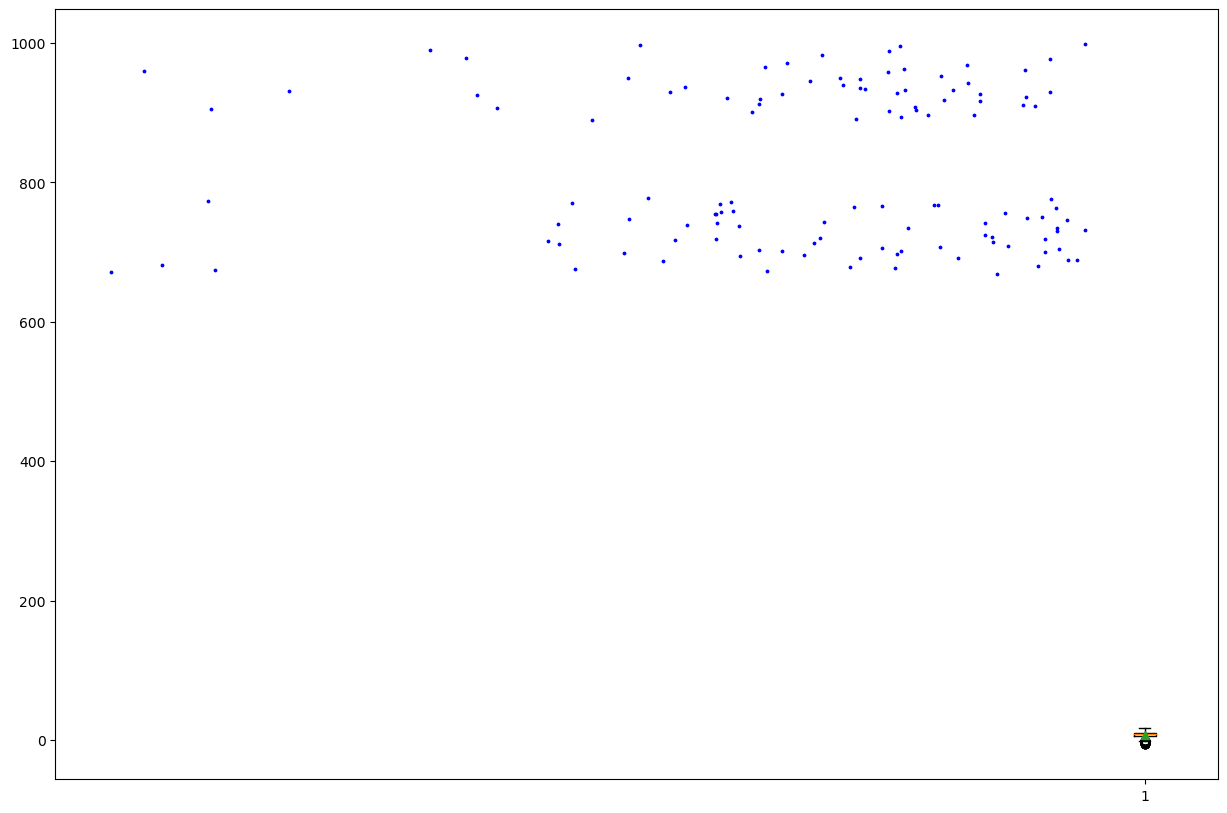

In [5]:
print ("Shape Of The Before Ouliers: ",df.shape)

#IQR = Q3-Q1
quar3_y = np.percentile(df['y'], 75)
quar1_y = np.percentile(df['y'], 25)
IQR_y = quar3_y - quar1_y


# 將所有特徵超出1.5倍IQR的概念將這些Outlier先去掉，避免對Model造成影響。
lower_y = quar1_y - IQR_y * 1.5
upper_y = quar3_y + IQR_y * 1.5
outliner_y = df[(df['y'] < lower_y) | (df['y'] > upper_y)]
# print("outlier of y：", outliner_y)

df = df.drop(outliner_y.index)
print ("Shape Of The After Ouliers: ",df.shape)

#箱型圖(用IQR)
plt.figure(figsize = (15, 10))
plt.boxplot(Rawdata['y'], showmeans = True)
plt.scatter(outliner_y['y'], outliner_y.index, color = 'blue', s = 3)
plt.show()

In [6]:
# feature為所有特徵資料
ground_true = df['class']
feature = df.drop('class', axis=1)
feature.head()



,x,y
0,9.28531,14.58790
1,12.39770,8.44890
2,8.73624,11.68030
3,9.10197,12.83270
4,12.29480,8.67373


In [7]:
from sklearn import preprocessing

numerical_columns = ["x", "y"]

scaler = preprocessing.MinMaxScaler()
feature[numerical_columns] = scaler.fit_transform(feature[numerical_columns])

feature.head(6)

,x,y
0,0.602598,0.870575
1,0.788075,0.487591
2,0.569877,0.689183
3,0.591672,0.761076
4,0.781943,0.501617
5,0.706391,0.626742


In [8]:
def WeightedEntropy(true_y, pred_y):
    uni_labels = np.unique(pred_y)
    entropies = []
    for label in uni_labels:
        # mask遮罩，讓y_pred選中特定label的資料點
        mask = (pred_y == label)
        cluster_true_labels = true_y[mask]
        cluster_entropy = entropy(np.bincount(cluster_true_labels) / len(cluster_true_labels), base=2)
        entropies.append(cluster_entropy)

    weights = np.bincount(pred_y) / len(pred_y)
    weights = weights[weights != 0]
    weighted_entropy = np.sum(entropies * weights)
    
    return weighted_entropy

### KMEANS

In [9]:
from sklearn.cluster import KMeans
import time

model_kmean = KMeans(n_clusters = 4, random_state = 1, init='k-means++') #分4群
start_time = time.time()
model_kmean.fit_predict(feature) #建立模型
end_time = time.time()
pred_kmeans = model_kmean.labels_
pred_kmeans

array([0, 1, 0, 0, 1, 0, 1, 3, 3, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 2, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 3, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 3, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 2,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 3, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 3, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 2, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,

In [10]:
from collections import Counter
pred_c = Counter(pred_kmeans)

pred  = sorted(pred_c)
print("predict    ：", pred_c)

acc_c = Counter(ground_true)
print("ground_true：", acc_c)

predict    ： Counter({1: 348, 0: 291, 3: 101, 2: 80})
ground_true： Counter({0: 667, 2: 83, 1: 45, 3: 25})


In [11]:
acc_kmeans = accuracy_score(ground_true, pred_kmeans)
entr_kmeans = WeightedEntropy(ground_true, pred_kmeans)
sse_kmeans =  model_kmean.inertia_
execution_time = end_time - start_time

print("----------------【KMEANS】----------------")
print("Accuracy：", acc_kmeans)
print("Entropy ：", entr_kmeans)
print("SSE     ：", sse_kmeans)
print("執行時間 ：", execution_time, "秒")

----------------【KMEANS】----------------
Accuracy： 0.3548780487804878
Entropy ： 0.21658245060132536
SSE     ： 20.628972787446585
執行時間 ： 0.13175606727600098 秒


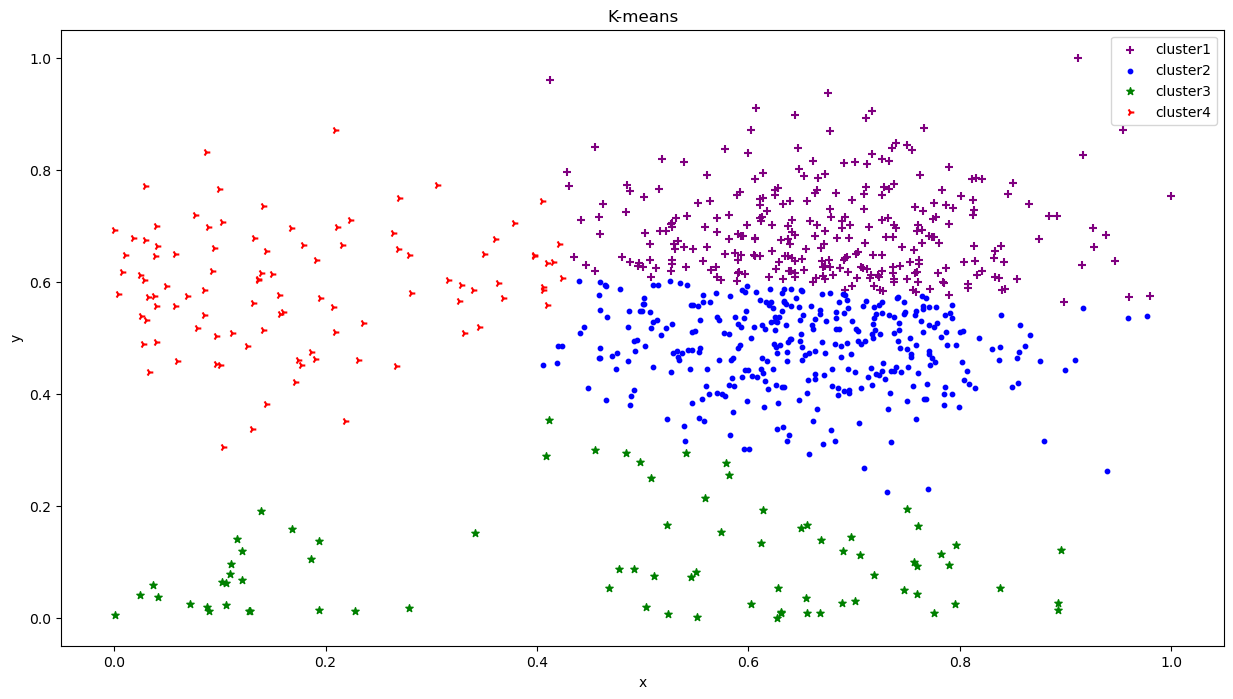

In [12]:
plt.figure(figsize=(15, 8))
x0 = feature[pred_kmeans == 0]
x1 = feature[pred_kmeans == 1]
x2 = feature[pred_kmeans == 2]
x3 = feature[pred_kmeans == 3]
plt.scatter(x0.iloc[:,0] ,x0.iloc[:,1] ,s=30 ,c='purple' ,marker='+' ,label='cluster1')
plt.scatter(x1.iloc[:,0] ,x1.iloc[:,1] ,s=10 ,c='blue' ,marker='o'  ,label='cluster2')
plt.scatter(x2.iloc[:,0] ,x2.iloc[:,1] ,s=30 ,c='green' ,marker='*' ,label='cluster3')
plt.scatter(x3.iloc[:,0] ,x3.iloc[:,1] ,s=30 ,c='red' ,marker='4' ,label='cluster4')
plt.title('K-means')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)
plt.show()

### Hierarchical Clustering

In [13]:
from sklearn.cluster import AgglomerativeClustering

model_H = AgglomerativeClustering(n_clusters = 4, affinity='euclidean', linkage='average')
start_time = time.time()
pred_Hierarchical = model_H.fit_predict(feature)
end_time = time.time()
execution_time = end_time - start_time
#affinity: 距離的計算方式，”euclidean”,”l1″,”l2″,”manhattan”,”cosine”
#linkage: 群與群之間的距離，”ward”,”complete”,”average”,”single”
pred_Hierarchical

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [14]:
pred_H = Counter(pred_Hierarchical)
print("predict    ：", pred_H)

gt = Counter(ground_true)
print("ground_true：", gt)

predict    ： Counter({0: 746, 1: 48, 3: 25, 2: 1})
ground_true： Counter({0: 667, 2: 83, 1: 45, 3: 25})


In [15]:
acc_H = accuracy_score(ground_true, pred_Hierarchical)
entr_H = WeightedEntropy(ground_true, pred_Hierarchical)

print("----------------【Hierarchical Clustering】----------------")
print("Accuracy：", acc_H)
print("Entropy ：", entr_H)
print("執行時間 ：", execution_time, "秒")

----------------【Hierarchical Clustering】----------------
Accuracy： 0.8914634146341464
Entropy ： 0.495660500752206
執行時間 ： 0.031973838806152344 秒


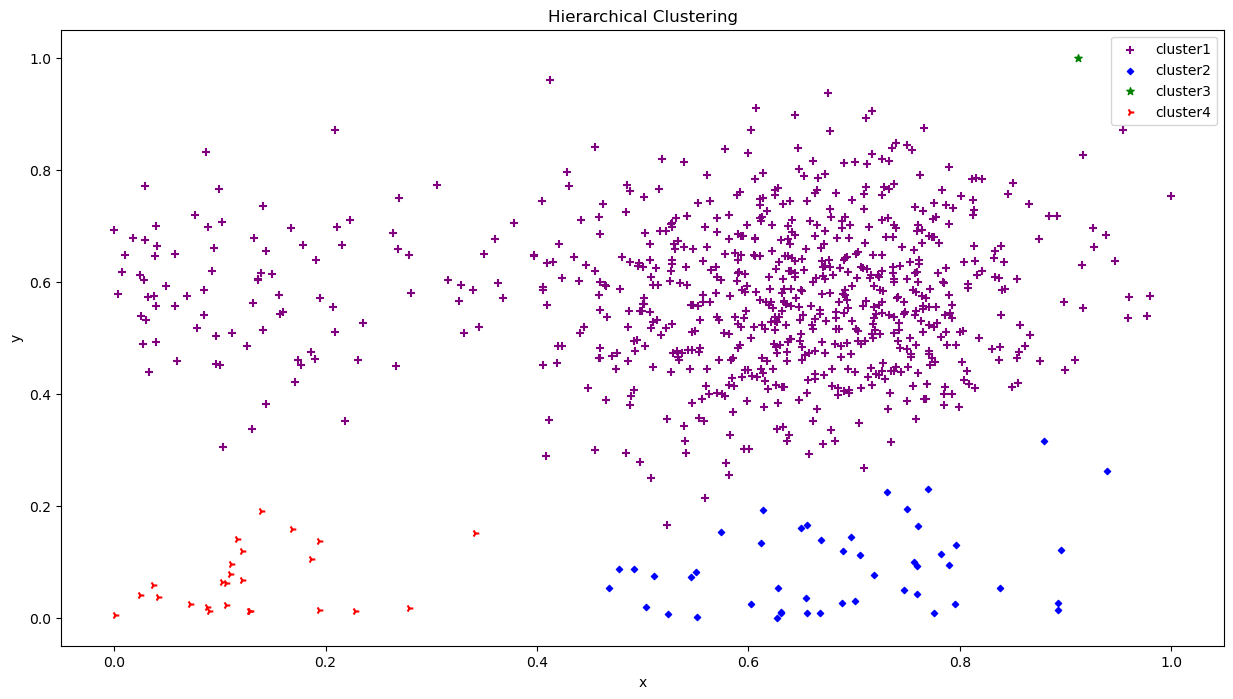

In [16]:
plt.figure(figsize=(15, 8))
x0 = feature[pred_Hierarchical == 0]
x1 = feature[pred_Hierarchical == 1]
x2 = feature[pred_Hierarchical == 2]
x3 = feature[pred_Hierarchical == 3]
plt.scatter(x0.iloc[:,0] ,x0.iloc[:,1] ,s=30 ,c='purple' ,marker='+' ,label='cluster1')
plt.scatter(x1.iloc[:,0] ,x1.iloc[:,1] ,s=10 ,c='blue' ,marker='D'  ,label='cluster2')
plt.scatter(x2.iloc[:,0] ,x2.iloc[:,1] ,s=30 ,c='green' ,marker='*' ,label='cluster3')
plt.scatter(x3.iloc[:,0] ,x3.iloc[:,1] ,s=30 ,c='red' ,marker='4' ,label='cluster4')
plt.title("Hierarchical Clustering")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)
plt.show()

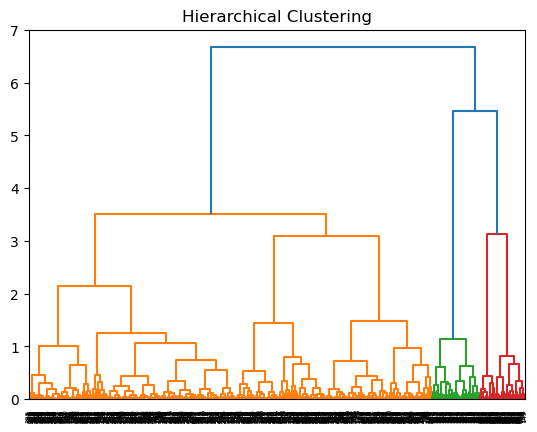

In [17]:
import scipy.cluster.hierarchy as sch
dis = sch.linkage(feature, method='ward')

sch.dendrogram(dis)
plt.title('Hierarchical Clustering')
plt.show()

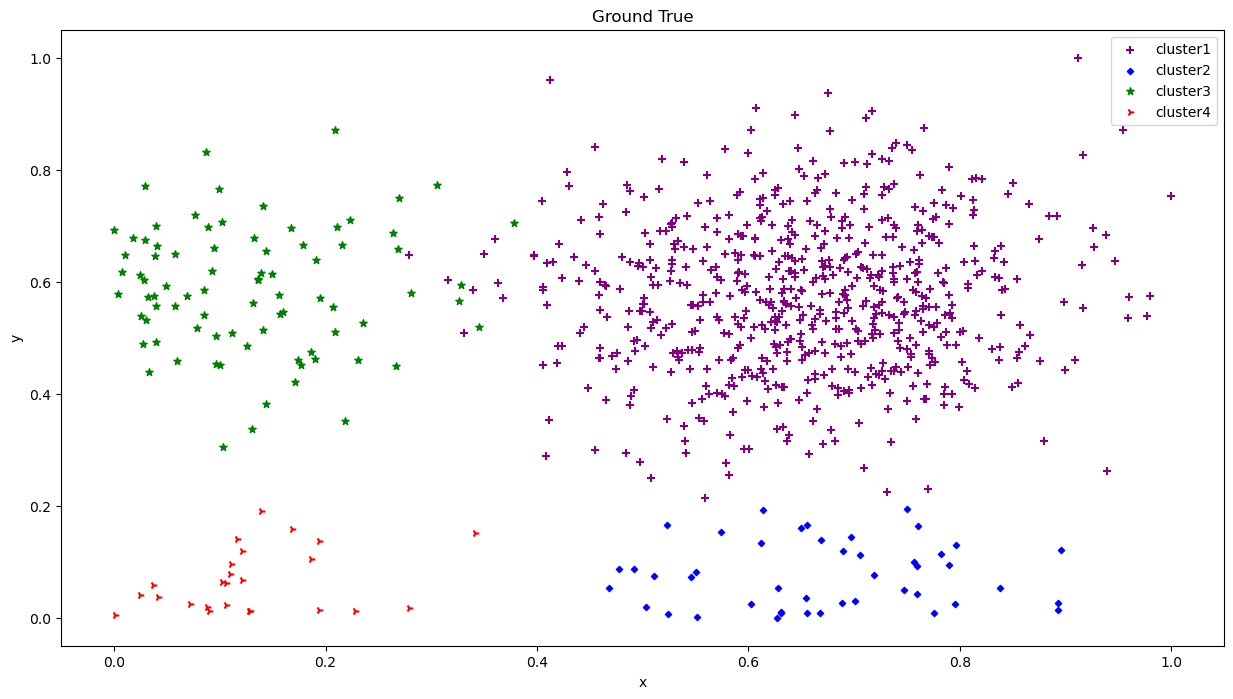

In [18]:
plt.figure(figsize=(15, 8))
x0 = feature[ground_true == 0]
x1 = feature[ground_true == 1]
x2 = feature[ground_true == 2]
x3 = feature[ground_true == 3]
plt.scatter(x0.iloc[:,0] ,x0.iloc[:,1] ,s=30 ,c='purple' ,marker='+' ,label='cluster1')
plt.scatter(x1.iloc[:,0] ,x1.iloc[:,1] ,s=10 ,c='blue' ,marker='D'  ,label='cluster2')
plt.scatter(x2.iloc[:,0] ,x2.iloc[:,1] ,s=30 ,c='green' ,marker='*' ,label='cluster3')
plt.scatter(x3.iloc[:,0] ,x3.iloc[:,1] ,s=30 ,c='red' ,marker='4' ,label='cluster4')
plt.title("Ground True")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)
plt.show()

### DBSCAN

In [19]:
from sklearn.cluster import DBSCAN
model_dbscan = DBSCAN(eps = 0.07741470944658732, min_samples = 10)
start_time = time.time()
model_dbscan.fit(feature)
end_time = time.time()
execution_time = end_time - start_time
pred_dbscan = model_dbscan.labels_

In [20]:
pred_D = Counter(pred_dbscan)
print("predict    ：", pred_D)

acc_c = Counter(ground_true)
print("ground_true：", acc_c)

predict    ： Counter({0: 660, 2: 69, -1: 35, 1: 34, 3: 22})
ground_true： Counter({0: 667, 2: 83, 1: 45, 3: 25})


In [21]:
np.unique(pred_dbscan)

array([-1,  0,  1,  2,  3], dtype=int64)

In [22]:
pred_dbscan[pred_dbscan == -1] = 8
acc_dbscan = accuracy_score(ground_true, pred_dbscan)
entr_dbscan = WeightedEntropy(ground_true, pred_dbscan)

print("----------------【DBSCAN】----------------")
print("Accuracy：", acc_dbscan)
print("Entropy ：", entr_dbscan)
print("執行時間 ：", execution_time, "秒")


----------------【DBSCAN】----------------
Accuracy： 0.9463414634146341
Entropy ： 0.16561494576122715
執行時間 ： 0.016535520553588867 秒


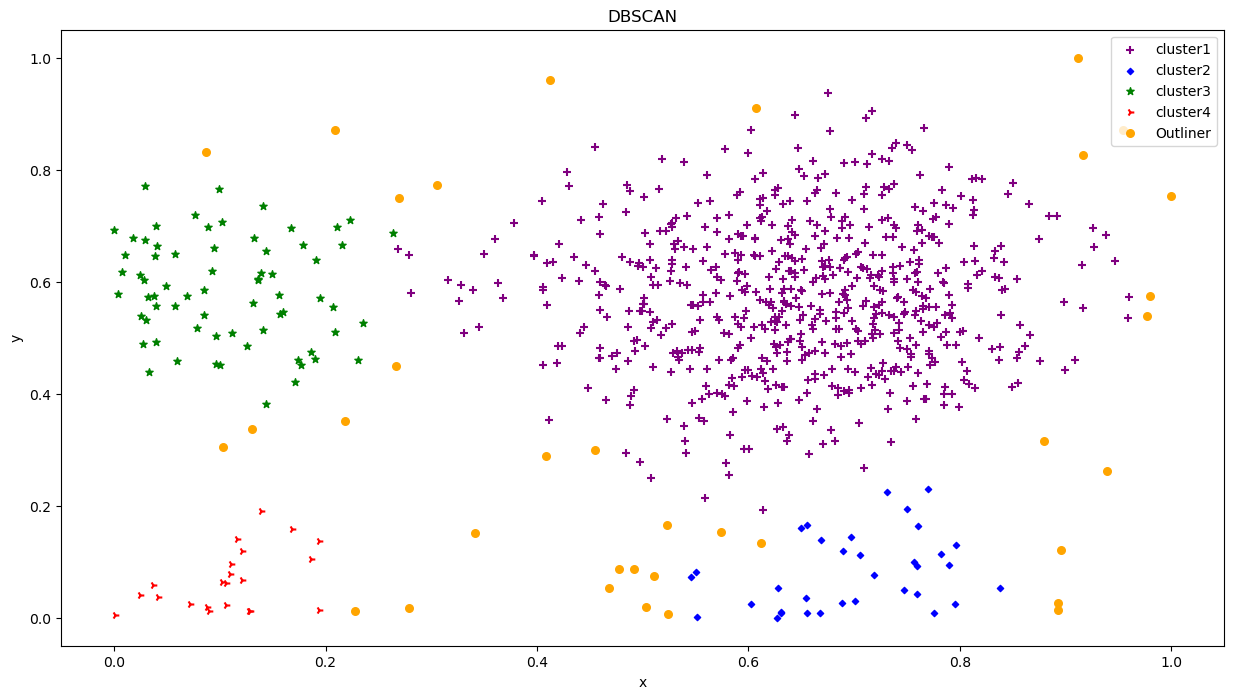

In [23]:
plt.figure(figsize=(15, 8))
x0 = feature[pred_dbscan == 0]
x1 = feature[pred_dbscan == 1]
x2 = feature[pred_dbscan == 2]
x3 = feature[pred_dbscan == 3]
outliner = feature[pred_dbscan == 8]
plt.scatter(x0.iloc[:,0] ,x0.iloc[:,1] ,s=30 ,c='purple' ,marker='+' ,label='cluster1')
plt.scatter(x1.iloc[:,0] ,x1.iloc[:,1] ,s=10 ,c='blue' ,marker='D'  ,label='cluster2')
plt.scatter(x2.iloc[:,0] ,x2.iloc[:,1] ,s=30 ,c='green' ,marker='*' ,label='cluster3')
plt.scatter(x3.iloc[:,0] ,x3.iloc[:,1] ,s=30 ,c='red' ,marker='4' ,label='cluster4')
plt.scatter(outliner.iloc[:,0] ,outliner.iloc[:,1] ,s=30 ,c='orange' ,marker='o' ,label='Outliner')
plt.title("DBSCAN")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc=1)
plt.show()

In [24]:
from sklearn.neighbors import NearestNeighbors
for j in range(4, 70):

    nearest_neighbors = NearestNeighbors(n_neighbors=j)
    neighbors = nearest_neighbors.fit(feature)
    distances, indices = neighbors.kneighbors(feature)
    distances = np.sort(distances[:,j-1], axis=0)

    from kneed import KneeLocator
    i = np.arange(len(distances))
    knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')
    
    model_dbscan = DBSCAN(eps = distances[knee.knee], min_samples = j)
    model_dbscan.fit(feature)    
    pred_dbscan_set = model_dbscan.labels_
    print("n: ", j, "eps: ", distances[knee.knee], "accuracy：", accuracy_score(ground_true, pred_dbscan_set))

n:  4 eps:  0.04570143254476002 accuracy： 0.776829268292683
n:  5 eps:  0.05089040651340375 accuracy： 0.7829268292682927
n:  6 eps:  0.057913536823709526 accuracy： 0.8292682926829268
n:  7 eps:  0.06304385580276672 accuracy： 0.8268292682926829
n:  8 eps:  0.06886090279785198 accuracy： 0.9390243902439024
n:  9 eps:  0.07369998681555459 accuracy： 0.9414634146341463
n:  10 eps:  0.07741470944658732 accuracy： 0.9463414634146341
n:  11 eps:  0.08093206013962319 accuracy： 0.9536585365853658
n:  12 eps:  0.08442048583723194 accuracy： 0.9573170731707317
n:  13 eps:  0.08772269178770455 accuracy： 0.8426829268292683
n:  14 eps:  0.09066453744948594 accuracy： 0.8536585365853658
n:  15 eps:  0.09451544540237429 accuracy： 0.9548780487804878
n:  16 eps:  0.09886624155022394 accuracy： 0.9548780487804878
n:  17 eps:  0.09877350824705033 accuracy： 0.9548780487804878
n:  18 eps:  0.0985812486516007 accuracy： 0.9524390243902439
n:  19 eps:  0.10198477369363759 accuracy： 0.9524390243902439
n:  20 eps:  0.

<Figure size 3000x3000 with 0 Axes>

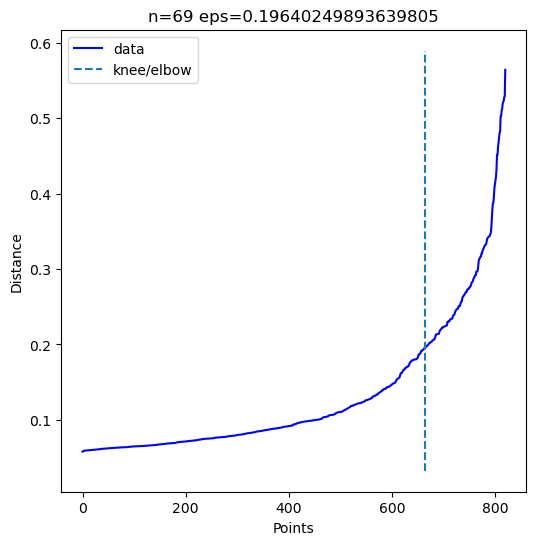

In [25]:
fig = plt.figure(figsize=(30,30))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")
plt.title(f'n={j} eps={distances[knee.knee]}')
plt.show()